The maximum height of the projectile is 0.7596m.
The distance to impact is 0.9889m.
The time of flight is 0.9339s.
The velocity at impact is 1.488m/s.


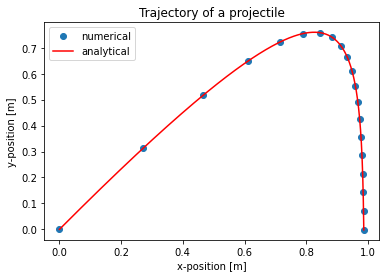

In [1]:
##################################################################
# Title: Projectile Motion in 2D
# Author: Jubelle Paa
# Description: This script can be used to numerically integrate
# the equation of motion of a projectile with atmospheric drag.
# It will use this answer to determine the projectile's
# distance to impact, max height, time of flight, and impact
# velocity. It will also plot its x-position vs its y-position,
# with a comparison to the analytical solution.
# Parameters/initial conditions can be changed.
##################################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# define parameters and initial conditions
c = 0.65  # atmospheric friction in kg/s
g = 9.81
m = 0.1
v0 = 10
theta = 50
tr = theta * (np.pi/180)  # angle in radians
t0 = 0.00  # initial time in seconds


def ddt(tF, xydv):
    """
    Returns an array of calculated dx/dt,
    dv_x/dt, dy/dt, and dv_y/dt values.
    Parameters:
        tF: current time t.
        xydv: list of function values
              at current time.
    """
    x = xydv[0]
    vx = xydv[1]
    y = xydv[2]
    vy = xydv[3]
    return np.array([vx, -c*vx/m, vy, -g-c*vy/m])


tmax = (2*v0*np.sin(tr)) / g  # approximate final time (without drag)
steps = 1000  # number of time steps

# array of time steps to evaluate the solution
tAF = np.linspace(t0, tmax, steps+1)

# set initial conditions:
x0 = 0
y0 = 0
vx0 = v0*np.cos(tr)
vy0 = v0*np.sin(tr)
inconds = [x0, vx0, y0, vy0]  # creates a list of initial conditions

# solves the differential equation at times tAF:
sol = integrate.solve_ivp(ddt, (tAF[0], tAF[-1]), inconds, t_eval=tAF)

yM = sol['y']  # extract y values
tA = sol['t']  # extract time points

# use the results of sol to determine values:

mh = yM[2][np.argmax(yM[2])]  # determines the greatest y value
print('The maximum height of the projectile is {0:.4}m.'.format(mh))

d = yM[0][np.argmax(yM[0])]  # determines the greatest x value
print('The distance to impact is {0:.4}m.'.format(d))

# find where the y trajectory of the projectile is negative:
i = np.where(yM[2] < 0)
# uses earliest index from above to extract the corresponding time value
tof = tA[i[0][0]]
print('The time of flight is {0:.4}s.'.format(tof))

vi = np.sqrt(yM[1][i[0][0]]**2 + yM[3][i[0][0]]**2)
# uses earliest index of i again to determine
# final x velocity and y velocity
print('The velocity at impact is {0:.4}m/s.'.format(vi))

tmax = tof  # redefines max time to calculated time of flight

# redetermine numerical points of x and y with less steps
steps2 = 19
tAFn = np.linspace(t0, tmax, steps2 + 1)
sol = integrate.solve_ivp(ddt, (tAFn[0], tAFn[-1]), inconds, t_eval=tAFn)
yM = sol['y']
tA = sol['t']

# determine analytical points of x and y
tAFa = np.linspace(t0, tmax, steps+1)
vt = m*g/c  # terminal velocity in m/s
xa = ((v0*vt)/g)*(1 - np.exp(-g*tAFa/vt))*np.cos(tr)
ya = (vt/g)*(vt+v0*np.sin(tr))*(1-np.exp(-g*tAFa/vt))-vt*tAFa

# plot the numerical and analytical trajectory of projectile
plt.plot(yM[0, :], yM[2, :], 'o', label='numerical')
plt.plot(xa, ya, 'r', label='analytical')
plt.title('Trajectory of a projectile')
plt.xlabel('x-position [m]')
plt.ylabel('y-position [m]')
plt.legend()
plt.show()